In [467]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [468]:
file_path = '/content/drive/MyDrive/Courses/ML/D3.csv'
sample = pd.DataFrame(pd.read_csv(file_path))
sample.head()

,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


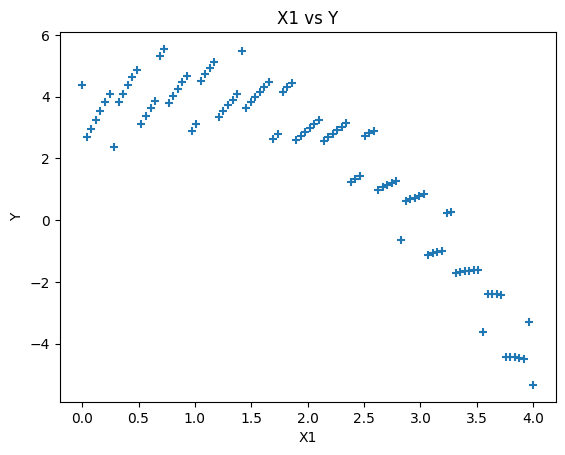

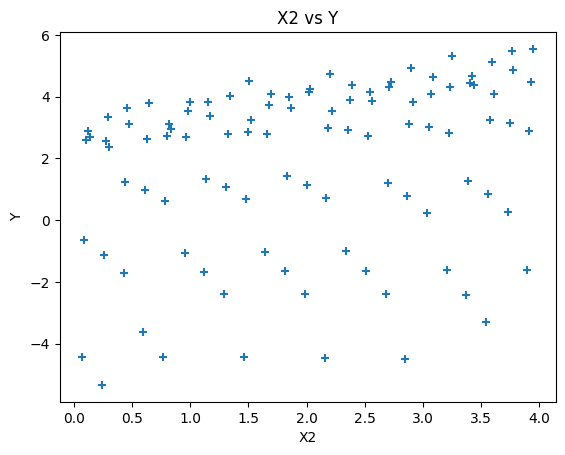

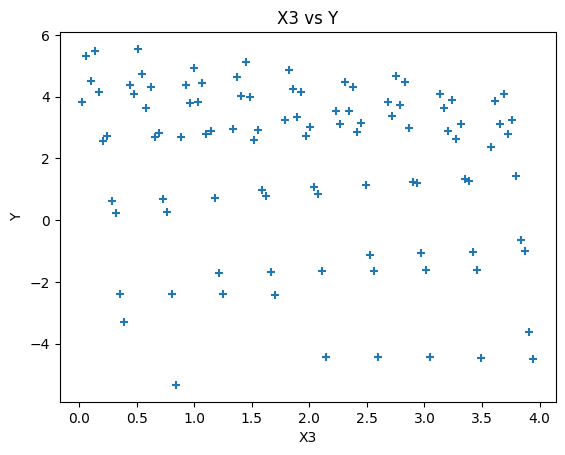

In [469]:
df = pd.read_csv("/content/drive/MyDrive/Courses/ML/D3.csv")

X = df[['X1', 'X2', 'X3']].values
Y = df['Y'].values

feature_names = ['X1', 'X2', 'X3']

for i in range(3):
    plt.scatter(X[:, i], Y, marker='+')
    plt.xlabel(feature_names[i])
    plt.ylabel("Y")
    plt.title(f"{feature_names[i]} vs Y")
    plt.show()

plt.show()

In [470]:
m = len(Y)
n = len(X)

X_0 = np.ones((m, 1))
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_1 = (X - X_mean) / X_std
X = np.hstack((X_0, X_1))

theta = np.zeros(X.shape[1])

def compute_cost(X, Y, theta):
  predictions = X.dot(theta)
  errors = predictions - Y
  sqrErrors = np.square(errors)
  cost = (1 / (2 * m)) * np.sum(errors ** 2)
  return cost

compute_cost(X, Y, theta)
cost = compute_cost(X, Y, theta)
print(f"The cost is: {cost}")


The cost is: 5.524438459196242


In [471]:
def gradient_descent(X, Y, theta, alpha, iterations):
  m = len(Y)
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sum_delta = (alpha / m) * X.transpose().dot(errors)
    theta -= sum_delta
    cost_history[i] = compute_cost(X, Y, theta)

  return theta, cost_history

iterations = 1500
learning_rate = 0.01
theta, cost_history = gradient_descent(X, Y, theta, learning_rate, iterations)

print(f"\nThe optimal parameters are: {theta}")
print('cost_history =', cost_history)
print(f"The final cost is: {cost_history[-1]}")



The optimal parameters are: [ 1.85127513 -2.33694771  0.62111653 -0.30734968]
cost_history = [5.42630529 5.33020073 5.23608253 ... 0.73846424 0.73846424 0.73846424]
The final cost is: 0.7384642415713742


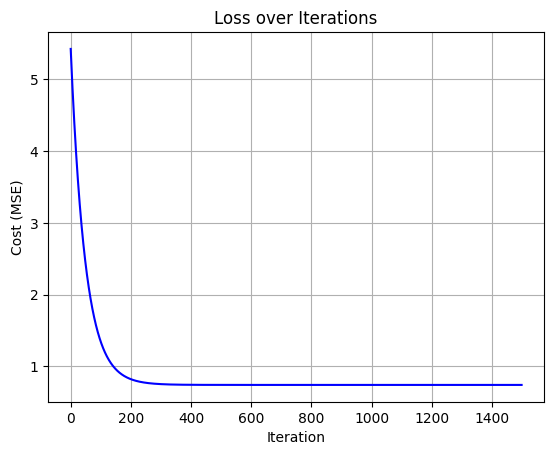

In [472]:
plt.plot(range(iterations), cost_history, color='blue')
plt.title("Loss over Iterations")
plt.xlabel("Iteration")
plt.ylabel("Cost (MSE)")
plt.grid(True)
plt.show()

In [473]:
# Predicting new values: (1,1,1), (2,0,4), (3,2,1)
X_new = np.array([
    [1, 1, 1],
    [2, 0, 4],
    [3, 2, 1]
])


X_new_norm = (X_new - X_mean) / X_std
X_new_b = np.hstack((np.ones((X_new.shape[0], 1)), X_new_norm))
predictions = X_new_b @ best_theta

print("Predictions:")
for x, y_pred in zip(X_new, predictions):
    print(f"Predicted Y = {y_pred:.4f}")

Predictions:
Predicted Y = 3.5774
Predicted Y = 0.2443
Predicted Y = 0.1025
